In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAPGothic'

% matplotlib inline

In [2]:
x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))

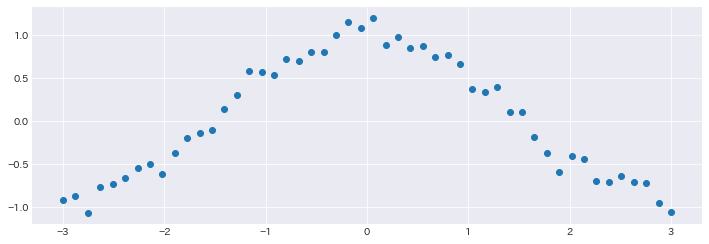

In [3]:
fig = plt.figure( figsize=(12, 4))
plt.scatter(x_train, y_train)

In [4]:
import tensorflow as tf
from edward.models import Normal

/Users/uchide/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
W_0 = Normal(loc=tf.zeros([1, 2]), scale=tf.ones([1, 2]))
W_1 = Normal(loc=tf.zeros([2, 1]), scale=tf.ones([2, 1]))
b_0 = Normal(tf.zeros(2), tf.ones(2))
b_1 = Normal(tf.zeros(1), tf.ones(1))

In [6]:
x = x_train
y = Normal(loc=tf.matmul(tf.tanh(tf.matmul(x, W_0) + b_0), W_1) + b_1,
           scale=0.1)

In [7]:
qW_0 = Normal(loc=tf.get_variable("qW_0/loc", [1, 2]),
              scale=tf.nn.softplus(tf.get_variable("qW_0/scale", [1, 2])))
qW_1 = Normal(loc=tf.get_variable("qW_1/loc", [2, 1]),
              scale=tf.nn.softplus(tf.get_variable("qW_1/scale", [2, 1])))
qb_0 = Normal(loc=tf.get_variable("qb_0/loc", [2]),
              scale=tf.nn.softplus(tf.get_variable("qb_0/scale", [2])))
qb_1 = Normal(loc=tf.get_variable("qb_1/loc", [1]),
              scale=tf.nn.softplus(tf.get_variable("qb_1/scale", [1])))

In [8]:
import edward as ed

In [9]:
inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1}, data={y: y_train})

/Users/uchide/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/edward/util/random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


In [10]:
inference.run(n_iter=1000)

1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 17.003


In [13]:
inference.data

{<ed.RandomVariable 'Normal_4/' shape=(50, 1) dtype=float32>: <tf.Variable 'data/Variable:0' shape=(50, 1) dtype=float32_ref>}

pymcの練習問題を解いてみる

In [17]:
from urllib.request import urlretrieve
urlretrieve('https://git.io/vXTVC', 'input/txtdata.csv')

('input/txtdata.csv', <http.client.HTTPMessage at 0x1c22cefa58>)

In [44]:
count_data = np.loadtxt('input/txtdata.csv')
n_count_data = len(count_data)

In [21]:
count_data

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

<Container object of 74 artists>

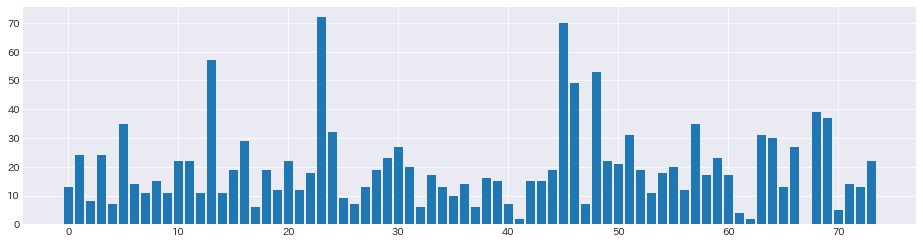

In [24]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(np.arange(len(count_data)), count_data)

19.743243243243242

In [42]:
from edward.models import Poisson, Exponential, Uniform

In [47]:
tau = Uniform(low=0.0, high=73.0)
alpha= np.mean(count_data)
lambda_1 = Exponential(rate=alpha)
lambda_2 = Exponential(rate=alpha)
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    '''
    変化点tauの前後で変わる2種類のlambdaを返す関数
    '''
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out
observation = Poisson(rate=lambda_)

TypeError: Failed to convert object of type <class 'function'> to Tensor. Contents: <function lambda_ at 0x1c2265fe18>. Consider casting elements to a supported type.

switchpointの実装の仕方がわからないので一旦停止

In [25]:
from edward.models import Normal

x = Normal(loc=tf.zeros(10), scale=tf.ones(10))
y = tf.constant(5.0)
x + y, x - y, x * y, x / y
tf.tanh(x * y) # tanhは活性化関数の一種、原点付近で-1から1に立ち上がる
x[2]  # 3rd normal rv in 

<tf.Tensor 'strided_slice:0' shape=() dtype=float32>